**Exploratory Data Analysis**

Key findings and visualizations 

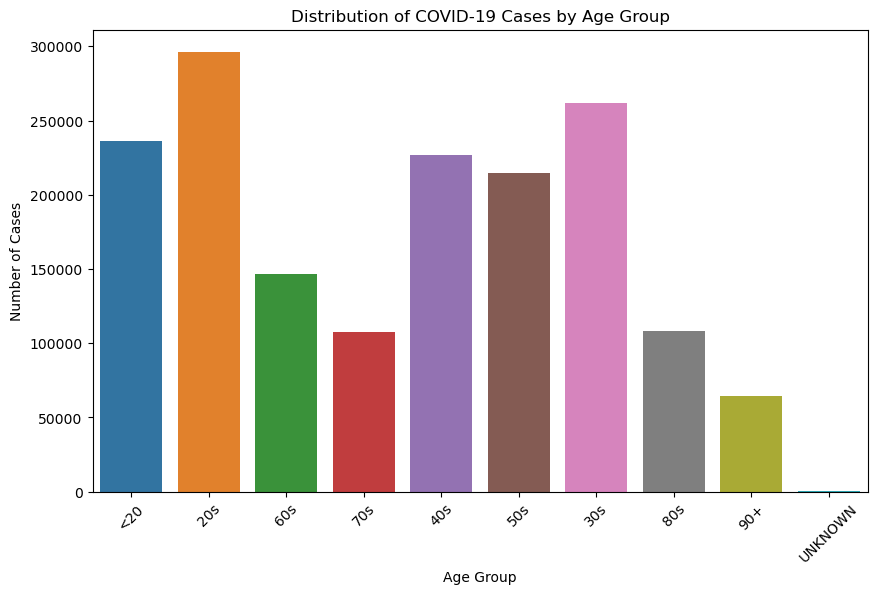

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of cases by age group
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Age_Group')
plt.title('Distribution of COVID-19 Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

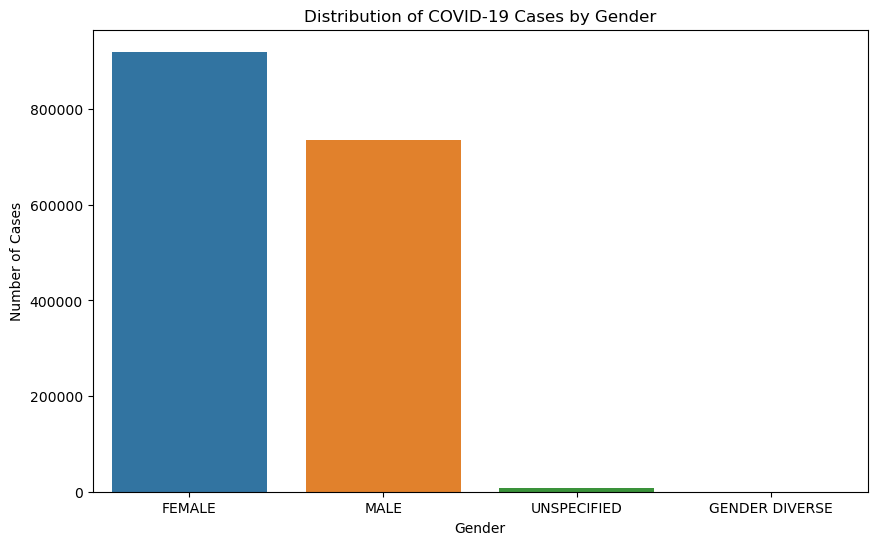

In [11]:
# Plot distribution of cases by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Client_Gender')
plt.title('Distribution of COVID-19 Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Cases')
plt.show()

In [12]:
# Cross-tabulation of age group and outcome
age_outcome_ct = pd.crosstab(df['Age_Group'], df['Outcome1'])
print(age_outcome_ct)

Outcome1   FATAL  Nonfatal
Age_Group                 
20s           51    296337
30s          126    261761
40s          276    226409
50s          820    213938
60s         1953    144432
70s         3701    104207
80s         6023    102483
90+         4828     59829
<20           30    236250
UNKNOWN        0       322


In [13]:
# Cross-tabulation of gender and outcome
gender_outcome_ct = pd.crosstab(df['Client_Gender'], df['Outcome1'])
print(gender_outcome_ct)

Outcome1        FATAL  Nonfatal
Client_Gender                  
FEMALE           8327    912048
GENDER DIVERSE      0         9
MALE             9426    725708
UNSPECIFIED        55      8203


In [14]:
# Perform Chi-Square Test for Client_Gender and Outcome1
from scipy.stats import chi2_contingency
chi2_gender, p_gender, dof_gender, ex_gender = chi2_contingency(gender_outcome_ct)
print(f'Chi-Square Test for Client_Gender and Outcome1: chi2={chi2_gender}, p-value={p_gender}')

Chi-Square Test for Client_Gender and Outcome1: chi2=562.868763407916, p-value=1.1285327612576004e-121


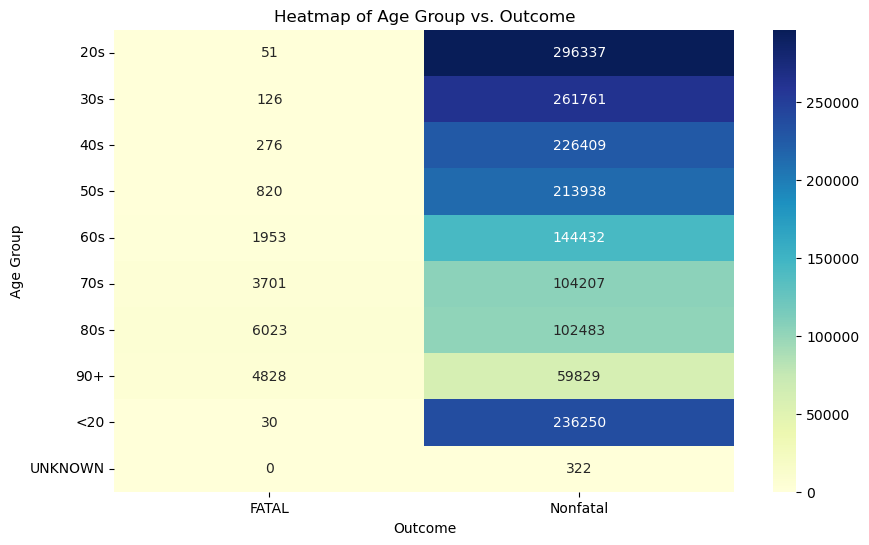

In [15]:
# Heatmap for Age Group and Outcome
plt.figure(figsize=(10, 6))
sns.heatmap(age_outcome_ct, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Age Group vs. Outcome')
plt.xlabel('Outcome')
plt.ylabel('Age Group')
plt.show()

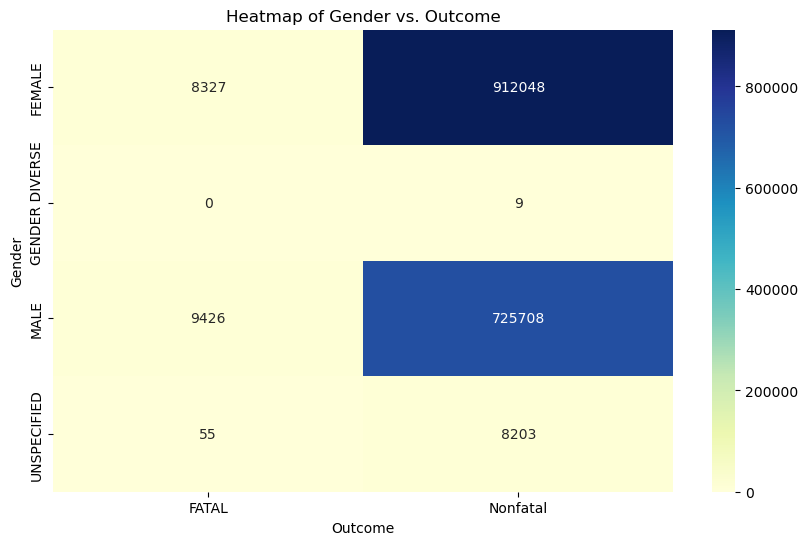

In [16]:
# Heatmap for Gender and Outcome
plt.figure(figsize=(10, 6))
sns.heatmap(gender_outcome_ct, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Gender vs. Outcome')
plt.xlabel('Outcome')
plt.ylabel('Gender')
plt.show()

**From the visualizations we can answer the first question**

1.	What are the key demographic factors (such as age group and gender) that influence the number of COVID-19 cases?

The highest number of COVID-19 cases is observed in the younger age groups (20s, 30s, <20).
The highest number of fatal cases is observed in older age groups (80s, 90+).
Females have a higher number of COVID-19 cases overall.
Males have a higher number of fatal cases compared to females, indicating a higher fatality rate among males.

These findings suggest that age and gender are significant demographic factors influencing the number of COVID-19 cases and outcomes, with older age groups and males being at higher risk for fatal outcomes.


In [17]:
# Check the unique values in Reporting_PHU and related columns
print(df['Reporting_PHU'].unique())
print(df[['Reporting_PHU_Address', 'Reporting_PHU_City', 'Reporting_PHU_Postal_Code', 'Reporting_PHU_Website', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']].head())

['Thunder Bay District Health Unit' 'York Region Public Health Services'
 'Grey Bruce Health Unit' 'Hamilton Public Health Services'
 'Haldimand-Norfolk Health Unit' 'Simcoe Muskoka District Health Unit'
 'Southwestern Public Health' 'Region of Waterloo, Public Health'
 'Eastern Ontario Health Unit' 'Toronto Public Health'
 'Middlesex-London Health Unit' 'Peel Public Health'
 'Hastings and Prince Edward Counties Health Unit' 'Ottawa Public Health'
 'Wellington-Dufferin-Guelph Public Health'
 'Windsor-Essex County Health Unit' 'Durham Region Health Department'
 'Peterborough Public Health'
 'Leeds, Grenville and Lanark District Health Unit'
 'Niagara Region Public Health Department'
 'Haliburton, Kawartha, Pine Ridge District Health Unit'
 'Halton Region Health Department' 'Sudbury & District Health Unit'
 'Porcupine Health Unit'
 'Kingston, Frontenac and Lennox & Addington Public Health'
 'Lambton Public Health' 'Brant County Health Unit'
 'Huron Perth District Health Unit' 'Chatham-Ke

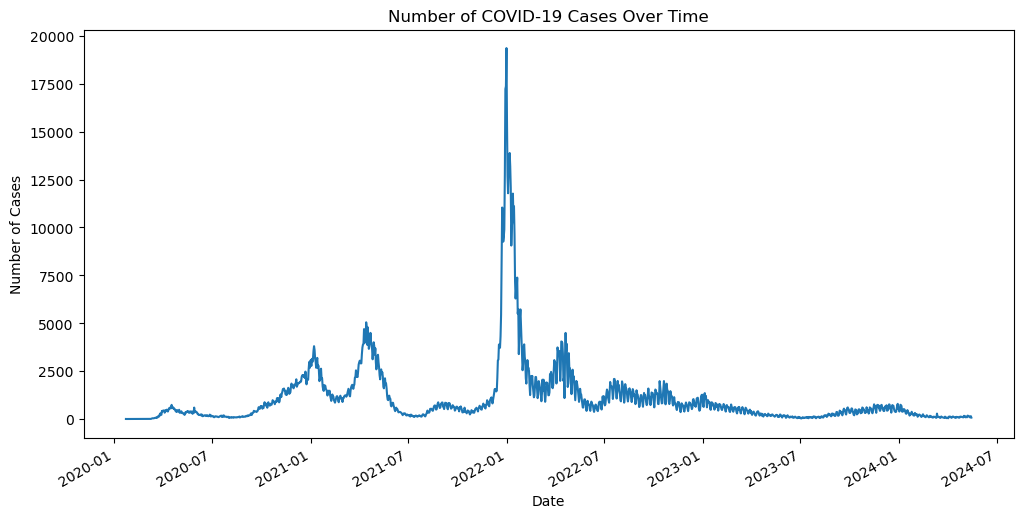

In [18]:
# Plot the number of cases over time
df['Case_Reported_Date'] = pd.to_datetime(df['Case_Reported_Date'])
cases_over_time = df.groupby('Case_Reported_Date').size()

plt.figure(figsize=(12, 6))
cases_over_time.plot()
plt.title('Number of COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


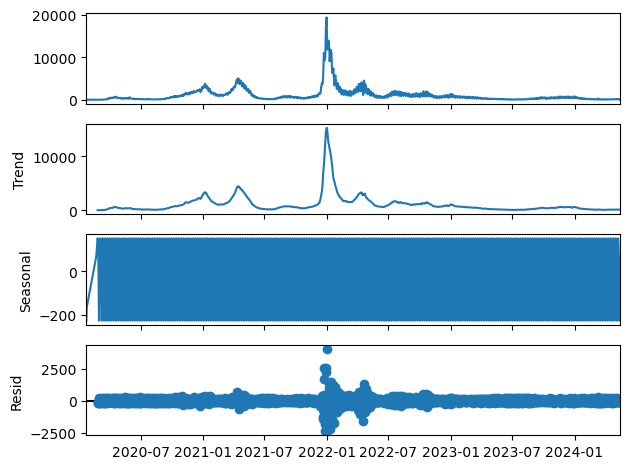

In [19]:
# Decompose the time series to identify trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(cases_over_time, model='additive', period=7)
decomposition.plot()
plt.show()

In [20]:
# Aggregate Data by Reporting_PHU and Date
daily_cases = df.groupby(['Reporting_PHU', 'Accurate_Episode_Date']).size().reset_index(name='case_count')
print(daily_cases)

                            Reporting_PHU Accurate_Episode_Date  case_count
0               Algoma Public Health Unit            2020-03-08           1
1               Algoma Public Health Unit            2020-03-15           1
2               Algoma Public Health Unit            2020-03-20           2
3               Algoma Public Health Unit            2020-03-22           2
4               Algoma Public Health Unit            2020-03-23           2
...                                   ...                   ...         ...
44527  York Region Public Health Services            2024-05-10           5
44528  York Region Public Health Services            2024-05-11           5
44529  York Region Public Health Services            2024-05-12           6
44530  York Region Public Health Services            2024-05-13          11
44531  York Region Public Health Services            2024-05-14           2

[44532 rows x 3 columns]


In [21]:
# Aggregate the number of cases by Reporting_PHU.
phu_case_counts = daily_cases.groupby('Reporting_PHU')['case_count'].sum().reset_index()
print(phu_case_counts)

                                        Reporting_PHU  case_count
0                           Algoma Public Health Unit       12108
1                            Brant County Health Unit       15615
2                            Chatham-Kent Health Unit       12025
3                     Durham Region Health Department       77117
4                         Eastern Ontario Health Unit       21991
5                              Grey Bruce Health Unit       12946
6                       Haldimand-Norfolk Health Unit       11872
7   Haliburton, Kawartha, Pine Ridge District Heal...       14652
8                     Halton Region Health Department       60832
9                     Hamilton Public Health Services       79149
10    Hastings and Prince Edward Counties Health Unit       15688
11                   Huron Perth District Health Unit       11138
12  Kingston, Frontenac and Lennox & Addington Pub...       26954
13                              Lambton Public Health       15259
14   Leeds

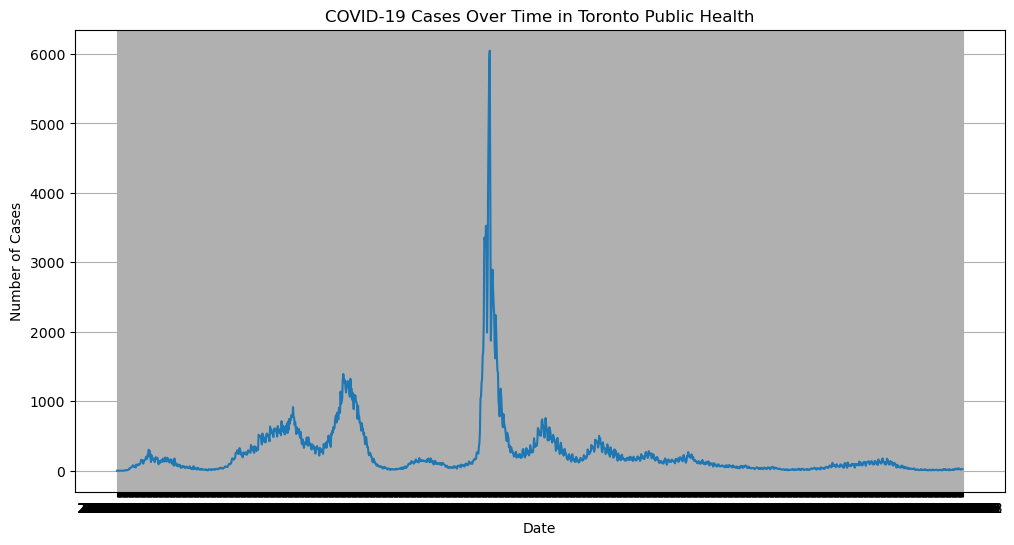

In [22]:
#Plot the number of cases over time using line charts
# Function to plot cases over time for a specific PHU
def plot_cases_over_time(phu_name):
    phu_data = daily_cases[daily_cases['Reporting_PHU'] == phu_name]
    plt.figure(figsize=(12, 6))
    plt.plot(phu_data['Accurate_Episode_Date'], phu_data['case_count'])
    plt.title(f'COVID-19 Cases Over Time in {phu_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.grid(True)
    plt.show()

# Plot for 'Toronto Public Health'
plot_cases_over_time('Toronto Public Health')

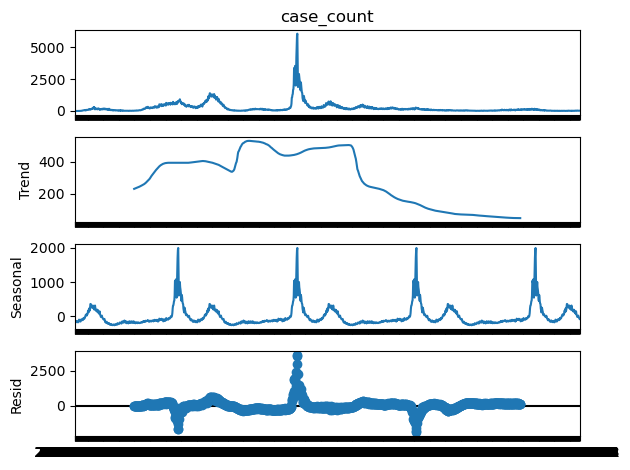

In [23]:
# Decompose the time series to identify trends, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series for 'Toronto Public Health'
phu_name = 'Toronto Public Health'
phu_data = daily_cases[daily_cases['Reporting_PHU'] == phu_name]
phu_data.set_index('Accurate_Episode_Date', inplace=True)
result = seasonal_decompose(phu_data['case_count'], model='additive', period=365)

result.plot()
plt.show()

C:\Users\ENG WAHEED\AppData\Local\Temp\ipykernel_9584\3098118584.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phu_data['date_int'] = np.arange(len(phu_data))
C:\Users\ENG WAHEED\AppData\Local\Temp\ipykernel_9584\3098118584.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phu_data['trend'] = results.predict(sm.add_constant(phu_data['date_int']))


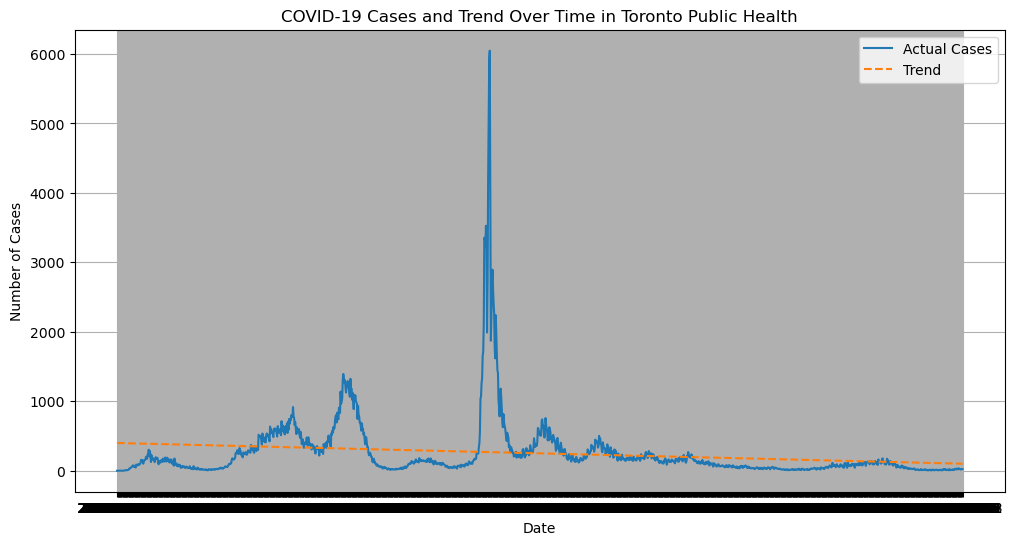

In [24]:
# Perform a trend analysis using statistical methods or machine learning models to identify patterns over time.

import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Example: Linear trend analysis for 'Toronto Public Health'
phu_name = 'Toronto Public Health'
phu_data = daily_cases[daily_cases['Reporting_PHU'] == phu_name]
phu_data.set_index('Accurate_Episode_Date', inplace=True)

# Adding a column for the date as an integer for trend analysis
phu_data['date_int'] = np.arange(len(phu_data))

# Fitting a linear regression model
model = sm.OLS(phu_data['case_count'], sm.add_constant(phu_data['date_int']))
results = model.fit()
phu_data['trend'] = results.predict(sm.add_constant(phu_data['date_int']))

# Plotting the actual cases and the trend
plt.figure(figsize=(12, 6))
plt.plot(phu_data.index, phu_data['case_count'], label='Actual Cases')
plt.plot(phu_data.index, phu_data['trend'], label='Trend', linestyle='--')
plt.title(f'COVID-19 Cases and Trend Over Time in {phu_name}')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

**From the visualizations and findings we can answer the Second question**

2.	How do the COVID-19 case trends vary over time and across different public health unites in Ontario?

The COVID-19 case trends in Ontario vary significantly over time and across different public health units. Urban areas like Toronto and Peel show multiple waves with high peaks, reflecting their larger and denser populations. In contrast, smaller and rural PHUs have lower case counts and less pronounced peaks. Seasonal decomposition reveals regular periodic increases in cases, and trend analysis shows an overall decline after major peaks, likely due to effective public health measures and vaccination campaigns.

These findings highlight the importance of tailored public health strategies to address the unique needs and circumstances of different regions within Ontario.